In [1]:
import pandas as pd
import numpy as np



/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/2504811429.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_icu = pd.read_csv('mimic-iv-2.2/icu/icustays.csv.gz')
df_icd = pd.read_csv('mimic-iv-2.2/hosp/diagnoses_icd.csv.gz')
df_admission = pd.read_csv('mimic-iv-2.2/hosp/admissions.csv.gz')
df_patients = pd.read_csv('mimic-iv-2.2/hosp/patients.csv.gz')
df_med = pd.read_csv('mimic-iv-2.2/hosp/prescriptions.csv.gz')

/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/386627112.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_med = pd.read_csv('mimic-iv-2.2/hosp/prescriptions.csv.gz')


In [ ]:
df_med.head()

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10000032,22595853,11700683,10000032-34,34.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Acetaminophen,...,004490,9.041989e+08,500mg Tablet,NaN,500,mg,1,TAB,NaN,PO/NG
1,10000032,22595853,14779570,10000032-22,22.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Sodium Chloride 0.9% Flush,...,NaN,0.000000e+00,10 mL Syringe,NaN,3,mL,0.3,SYR,3.0,IV
2,10000032,22595853,19796602,10000032-50,50.0,P260SK,2180-05-08 08:00:00,2180-05-07 22:00:00,MAIN,Furosemide,...,008209,5.107901e+10,40mg Tablet,NaN,40,mg,1,TAB,1.0,PO/NG
3,10000032,22595853,20256254,10000032-32,32.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Raltegravir,...,063231,6.022761e+06,400 mg Tablet,NaN,400,mg,1,TAB,2.0,PO
4,10000032,22595853,28781051,10000032-27,27.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Heparin,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,NaN,5000,UNIT,1,mL,3.0,SC


In [3]:
## NEED MEDICATION LIST
medication_lst = ["Enalapril", "Lisinopril", "Ramipril", "Carvedilol", "Metoprolol Succinate", "Bisoprolol", "Furosemide", "Bumetanide", "Spironolactone", "Warfarin", "Apixaban", "Rivaroxaban"]
grouped_med = df_med.groupby('subject_id')
grouped_med = grouped_med['drug'].apply(list)
filtered_grouped_med = grouped_med[grouped_med.apply(lambda x: any(code in medication_lst for code in x))]
grouped_med

subject_id
10000032    [Acetaminophen, Sodium Chloride 0.9%  Flush, F...
10000084    [QUEtiapine Fumarate, Heparin, QUEtiapine Fuma...
10000117    [Heparin, Sodium Chloride 0.9%  Flush, Senna, ...
10000248    [Influenza Vaccine Quadrivalent, Acetaminophen...
10000560    [Scopolamine Patch, Ketorolac, Lorazepam, Pota...
                                  ...                        
19999625    [5% Dextrose, 1/2 NS, Donepezil, 5% Dextrose, ...
19999784    [Sodium Bicarbonate, 5% Dextrose, Methotrexate...
19999828    [Insulin, Potassium Chloride, Insulin, Insulin...
19999840    [Potassium Chloride, Bisacodyl, Phenytoin, 0.9...
19999987    [Bag, Magnesium Sulfate, Chlorhexidine Glucona...
Name: drug, Length: 158421, dtype: object

In [4]:
heart_failure_code = [
    str(4280), str(4281), str(42820), str(42821), str(42822), str(42823), str(42830), str(42831), str(42832), str(42833), str(42840), str(42841), str(42842), str(42843), str(4289),
    'I50', 'I502', 'I5020', 'I5021', 'I5022', 'I5023', 'I503', 'I5030', 'I5031', 'I5032', 'I5033', 'I504', 'I5040',
    'I5041', 'I5042', 'I5043', 'I508', 'I5081', 'I50810', 'I50811', 'I50812', 'I50813', 'I50814', 'I5082', 'I5083',
    'I5084', 'I5089', 'I509'
]
df_icd["icd_code"] = df_icd["icd_code"].astype(str)

In [5]:
grouped_icd = df_icd.groupby('subject_id')
grouped_icd = grouped_icd['icd_code'].apply(list)
filtered_grouped_icd = grouped_icd[grouped_icd.apply(lambda x: any(code in heart_failure_code for code in x))]
filtered_df_icu = df_icu[df_icu['subject_id'].isin(filtered_grouped_icd.index)]

In [6]:
filtered_df_icu

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
6,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352
7,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576
8,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912
9,10002155,28994087,31090461,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2130-09-24 00:50:00,2130-09-27 22:13:41,3.891447
...,...,...,...,...,...,...,...,...
73163,19998330,24096838,31199714,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2178-11-29 21:51:19,2178-11-29 22:44:27,0.036898
73164,19998330,24096838,33428243,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2178-11-27 22:53:00,2178-11-29 21:29:39,1.942118
73165,19998330,24492004,32641669,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2178-10-01 08:51:00,2178-10-03 23:25:08,2.607037
73166,19998591,24349193,31144045,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2185-07-16 18:48:18,2185-07-26 18:27:01,9.985220


In [7]:
grouped_df_icu = df_icu.groupby('subject_id')
most_recent_hadm_id = grouped_df_icu['intime'].idxmax()
most_recent_df_icu = df_icu.loc[most_recent_hadm_id]
most_recent_df_icu


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588
5,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817
...,...,...,...,...,...,...,...,...
73176,19999442,26785317,32336619,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2148-11-19 14:23:43,2148-11-26 13:12:15,6.950370
73177,19999625,25304202,31070865,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2139-10-10 19:18:00,2139-10-11 18:21:28,0.960741
73178,19999828,25744818,36075953,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2149-01-08 18:12:00,2149-01-10 13:11:02,1.790995
73179,19999840,21033226,38978960,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),2164-09-12 09:26:28,2164-09-17 16:35:15,5.297766


In [8]:
not_in_most_recent_hadm_id = df_icd[~df_icd['hadm_id'].isin(most_recent_df_icu['hadm_id'])]
most_recent_hadm_id = df_icd[df_icd['hadm_id'].isin(most_recent_df_icu['hadm_id'])]

temp = df_icd[df_icd['subject_id'].isin(filtered_df_icu['subject_id'])]
temp1 = temp[temp['hadm_id'].isin(most_recent_hadm_id['hadm_id'])]
temp = temp[temp['hadm_id'].isin(not_in_most_recent_hadm_id['hadm_id'])]

In [9]:
grouped_icd = temp.groupby(['subject_id'])
grouped_icd = grouped_icd['icd_code'].apply(list)
previous_HF = grouped_icd[grouped_icd.apply(lambda x: any(code in heart_failure_code for code in x))]
prev_HF_subject = previous_HF.index.tolist()
len(prev_HF_subject)

8581

In [10]:
grouped_icd = temp1.groupby(['subject_id'])
grouped_icd = grouped_icd['icd_code'].apply(list)
previous_HF1 = grouped_icd[grouped_icd.apply(lambda x: any(code in heart_failure_code for code in x))]
prev_HF_subject1 = previous_HF1.index.tolist()
len(prev_HF_subject1)

12146

In [11]:
filtered_df_icu 

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
6,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352
7,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576
8,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912
9,10002155,28994087,31090461,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2130-09-24 00:50:00,2130-09-27 22:13:41,3.891447
...,...,...,...,...,...,...,...,...
73163,19998330,24096838,31199714,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2178-11-29 21:51:19,2178-11-29 22:44:27,0.036898
73164,19998330,24096838,33428243,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2178-11-27 22:53:00,2178-11-29 21:29:39,1.942118
73165,19998330,24492004,32641669,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2178-10-01 08:51:00,2178-10-03 23:25:08,2.607037
73166,19998591,24349193,31144045,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2185-07-16 18:48:18,2185-07-26 18:27:01,9.985220


In [12]:
grouped_filtered_df_icu = filtered_df_icu.groupby('subject_id').apply(lambda x: x.loc[x['intime'].idxmax()])
selected_columns = grouped_filtered_df_icu[['subject_id', "hadm_id", 'intime', 'outtime', 'los', "first_careunit", "last_careunit"]]
selected_columns.reset_index(drop=True, inplace=True)
selected_columns
#selected_columns.to_csv('filtered_icu_latest_stay.csv', index=False)


/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/3698103655.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_filtered_df_icu = filtered_df_icu.groupby('subject_id').apply(lambda x: x.loc[x['intime'].idxmax()])


,subject_id,hadm_id,intime,outtime,los,first_careunit,last_careunit
0,10000980,26913865,2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,10002013,23581541,2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
2,10002155,20345487,2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
3,10002428,23473524,2156-05-11 14:49:34,2156-05-22 14:16:46,10.977222,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU)
4,10002430,26295318,2129-06-13 00:43:08,2129-06-15 22:51:40,2.922593,Coronary Care Unit (CCU),Coronary Care Unit (CCU)
...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-27 02:53:13,2122-07-28 12:33:32,1.402998,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
14505,19997473,27787494,2173-09-17 15:07:55,2173-09-22 06:39:09,4.646690,Coronary Care Unit (CCU),Coronary Care Unit (CCU)
14506,19997752,29452285,2128-03-02 11:09:09,2128-03-07 11:46:51,5.026181,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
14507,19998330,24096838,2178-11-29 21:51:19,2178-11-29 22:44:27,0.036898,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)


In [13]:
df_admission_filtered = df_admission[df_admission['hadm_id'].isin(selected_columns['hadm_id'])]
df_admission_filtered = df_admission_filtered[["subject_id", "hadm_id", "admittime", "dischtime", "deathtime", "insurance", "language", "marital_status", "race"]]
merged_df = df_admission_filtered.merge(selected_columns, on=['hadm_id', 'subject_id'])
merged_df

,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,outtime,los,first_careunit,last_careunit
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,10002013,23581541,2160-05-18 07:45:00,2160-05-23 13:30:00,NaN,Medicare,ENGLISH,SINGLE,OTHER,2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
2,10002155,20345487,2131-03-09 20:33:00,2131-03-10 01:55:00,2131-03-10 21:53:00,Other,ENGLISH,MARRIED,WHITE,2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
3,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaN,Medicare,ENGLISH,WIDOWED,WHITE,2156-05-11 14:49:34,2156-05-22 14:16:46,10.977222,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU)
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaN,Medicare,ENGLISH,WIDOWED,WHITE,2129-06-13 00:43:08,2129-06-15 22:51:40,2.922593,Coronary Care Unit (CCU),Coronary Care Unit (CCU)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-22 14:00:00,2122-07-30 16:30:00,NaN,Other,ENGLISH,SINGLE,WHITE,2122-07-27 02:53:13,2122-07-28 12:33:32,1.402998,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
14505,19997473,27787494,2173-09-11 00:53:00,2173-10-02 15:50:00,NaN,Medicare,ENGLISH,MARRIED,WHITE,2173-09-17 15:07:55,2173-09-22 06:39:09,4.646690,Coronary Care Unit (CCU),Coronary Care Unit (CCU)
14506,19997752,29452285,2128-02-28 21:28:00,2128-03-10 14:35:00,NaN,Other,ENGLISH,MARRIED,WHITE,2128-03-02 11:09:09,2128-03-07 11:46:51,5.026181,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU)
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaN,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2178-11-29 21:51:19,2178-11-29 22:44:27,0.036898,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)


In [14]:
df_patients_filtered = df_patients[df_patients['subject_id'].isin(merged_df['subject_id'])]
final_df = merged_df.merge(df_patients_filtered, on='subject_id')
#final_df.to_csv('filtered_icu_latest_with_demographics.csv', index=False)


In [15]:
final_df['admittime'] = pd.to_datetime(final_df['admittime'])
final_df['dischtime'] = pd.to_datetime(final_df['dischtime'])
final_df['deathtime'] = pd.to_datetime(final_df['deathtime'])
final_df['dod'] = pd.to_datetime(final_df['dod'])

final_df["dischtime_since_admission"] = final_df['dischtime'] - final_df['admittime']
final_df["dod_since_disch"] = final_df['dod'] - final_df['dischtime']

# Convert to days
final_df["dischtime_since_admission"] = final_df["dischtime_since_admission"] / pd.Timedelta(days=1)
final_df["dod_since_disch"] = final_df["dod_since_disch"] / pd.Timedelta(days=1)

final_df["censoring_time"] = 365

final_df


,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,...,first_careunit,last_careunit,gender,anchor_age,anchor_year,anchor_year_group,dod,dischtime_since_admission,dod_since_disch,censoring_time
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaT,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 08:42:00,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,73,2186,2008 - 2010,2193-08-26,5.806944,1514.875000,365
1,10002013,23581541,2160-05-18 07:45:00,2160-05-23 13:30:00,NaT,Medicare,ENGLISH,SINGLE,OTHER,2160-05-18 10:00:53,...,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),F,53,2156,2008 - 2010,NaT,5.239583,NaN,365
2,10002155,20345487,2131-03-09 20:33:00,2131-03-10 01:55:00,2131-03-10 21:53:00,Other,ENGLISH,MARRIED,WHITE,2131-03-09 21:33:00,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,80,2128,2008 - 2010,2131-03-10,0.223611,-0.079861,365
3,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2156-05-11 14:49:34,...,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU),F,80,2155,2011 - 2013,NaT,10.977083,NaN,365
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2129-06-13 00:43:08,...,Coronary Care Unit (CCU),Coronary Care Unit (CCU),M,86,2125,2014 - 2016,2130-01-11,11.667361,200.332639,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-22 14:00:00,2122-07-30 16:30:00,NaT,Other,ENGLISH,SINGLE,WHITE,2122-07-27 02:53:13,...,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),F,52,2121,2014 - 2016,NaT,8.104167,NaN,365
14505,19997473,27787494,2173-09-11 00:53:00,2173-10-02 15:50:00,NaT,Medicare,ENGLISH,MARRIED,WHITE,2173-09-17 15:07:55,...,Coronary Care Unit (CCU),Coronary Care Unit (CCU),F,82,2173,2014 - 2016,NaT,21.622917,NaN,365
14506,19997752,29452285,2128-02-28 21:28:00,2128-03-10 14:35:00,NaT,Other,ENGLISH,MARRIED,WHITE,2128-03-02 11:09:09,...,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),F,66,2128,2014 - 2016,NaT,10.713194,NaN,365
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaT,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2178-11-29 21:51:19,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,71,2177,2011 - 2013,2178-12-08,3.804861,6.284722,365


In [16]:
final_df["dod_since_disch"].describe()
smallest_values = final_df["dod_since_disch"].sort_values().tail(10).dropna()
print(smallest_values)

smallest_values = final_df["dod_since_disch"].dropna().sort_values().head(10)
print(smallest_values)


Series([], Name: dod_since_disch, dtype: float64)
9014    -331.694444
2607      -0.998611
5470      -0.995833
7817      -0.995833
14427     -0.993750
10769     -0.993056
12833     -0.989583
7317      -0.986111
2348      -0.986111
7675      -0.985417
Name: dod_since_disch, dtype: float64


In [17]:
import re
hypertension_codes = [r'401.\w', 'I10']
atrial_fibrillation_codes = ['427.31', 'I48.91']
type1_diabetes_codes = [r'250.\w1', r"E10.\w"]
type2_diabetes_codes = [r'250.\w0', r'E11.\w']
copd_codes = ['496', r'J44.\w']
asthma_codes = [r'493.\w\w', r'J45.\w']
liver_disease_codes = [r'571.\w', 'K70", "K71", "K72', 'K73', 'K74', 'K75', 'K76', 'K77']
chronic_kidney_disease_codes = [r'585.\w', r'N18.\w']

list1 = [str(i) for i in range(140, 240)]
list2 = [f"C{i:02d}" for i in range(0, 100)]
list3 = [f"D{i:02d}" for i in range(0, 50)]
cancer_codes_1 = list1 + list2 + list3

depression_codes = [r'296.2\w', r'296.3\w', '311', r'F32.\w', r'F33.\w']
osteoarthritis_codes = [r'715.\w\w', "M15", "M16", "M17", "M18", "M19"]

list1 = [str(i) for i in range(280, 286)]
list2 = [f"D{i:02d}" for i in range(50, 65)]
anemia_codes_1 = list1 + list2

hypertension_codes = [r'401.\w']
hypertension_codes_no_w = ['I10']

atrial_fibrillation_codes = [r'I48.\w', r"I48.\w\w"]
atrial_fibrillation_codes_no_w = ['427.31']

type1_diabetes_codes = [r'250.\w1', r"E10.\w"]
type1_diabetes_codes_no_w = []

type2_diabetes_codes = [r'250.\w0', r'E11.\w']
type2_diabetes_codes_no_w = []

copd_codes = [r'J44.\w']
copd_codes_no_w = ['496']

asthma_codes = [r'493.\w\w', r'J45.\w']
asthma_codes_no_w = []

liver_disease_codes = [r'571.\w']
liver_disease_codes_no_w = ['K70", "K71", "K72', 'K73', 'K74', 'K75', 'K76', 'K77']

chronic_kidney_disease_codes = [r'585.\w', r'N18.\w', r"403.\w\w", r"404.\w\w"]
chronic_kidney_disease_codes_no_w = ["N18"]

cancer_codes = []
cancer_codes_no_w = cancer_codes_1

depression_codes = [r'296.2\w', r'296.3\w', r'F32.\w', r'F33.\w']
depression_codes_no_w = ['311']

osteoarthritis_codes = [r'715.\w\w']
osteoarthritis_codes_no_w = ["M15", "M16", "M17", "M18", "M19"]

anemia_codes = []
anemia_codes_no_w = anemia_codes_1


In [18]:
import re
def check_string_pattern(patterns, not_patterns, strings):
    for string in strings:
        for pattern in patterns:
            if re.search(pattern, string):
                return True
    if any(code in strings for code in not_patterns):
        return True
    return False

strings = ["715.2"]
check_string_pattern(osteoarthritis_codes, osteoarthritis_codes_no_w, strings)

False

In [19]:
final_df['has_type1_diabetes'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(type1_diabetes_codes, type1_diabetes_codes_no_w, filtered_grouped_icd[x])]))
final_df['has_type2_diabetes'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(type2_diabetes_codes,type2_diabetes_codes_no_w ,filtered_grouped_icd[x])]))
final_df['has_hypertension'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(hypertension_codes, hypertension_codes_no_w ,filtered_grouped_icd[x])]))
final_df['has_atrial_fibrillation'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(atrial_fibrillation_codes, atrial_fibrillation_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_copd'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(copd_codes, copd_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_asthma'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(asthma_codes, asthma_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_liver_disease'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(liver_disease_codes,liver_disease_codes_no_w, filtered_grouped_icd[x])]))
final_df['has_chronic_kidney_disease'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(chronic_kidney_disease_codes, chronic_kidney_disease_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_cancer'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(cancer_codes, cancer_codes_no_w, filtered_grouped_icd[x])]))
final_df['has_depression'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(depression_codes, depression_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_osteoarthritis'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(osteoarthritis_codes, osteoarthritis_codes_no_w,filtered_grouped_icd[x])]))
final_df['has_anemia'] = final_df['subject_id'].apply(lambda x: any([check_string_pattern(anemia_codes,anemia_codes_no_w, filtered_grouped_icd[x])]))




In [20]:
disease_columns = ['has_hypertension', 'has_atrial_fibrillation', 'has_type1_diabetes', 'has_type2_diabetes', 'has_copd', 'has_asthma', 'has_liver_disease', 'has_chronic_kidney_disease', 'has_cancer', 'has_depression', 'has_osteoarthritis', 'has_anemia']

average_frequency = final_df[disease_columns].mean()
average_frequency


has_hypertension              0.185540
has_atrial_fibrillation       0.213660
has_type1_diabetes            0.014129
has_type2_diabetes            0.179406
has_copd                      0.147357
has_asthma                    0.066855
has_liver_disease             0.002274
has_chronic_kidney_disease    0.003308
has_cancer                    0.025846
has_depression                0.166311
has_osteoarthritis            0.000000
has_anemia                    0.161417
dtype: float64

In [21]:
final_df['prev_HF'] = final_df['subject_id'].isin(prev_HF_subject) & ~final_df['subject_id'].isin(prev_HF_subject1) 
final_df

,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,...,has_atrial_fibrillation,has_copd,has_asthma,has_liver_disease,has_chronic_kidney_disease,has_cancer,has_depression,has_osteoarthritis,has_anemia,prev_HF
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaT,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 08:42:00,...,False,True,False,False,False,False,False,False,False,False
1,10002013,23581541,2160-05-18 07:45:00,2160-05-23 13:30:00,NaT,Medicare,ENGLISH,SINGLE,OTHER,2160-05-18 10:00:53,...,False,True,False,False,False,False,True,False,False,False
2,10002155,20345487,2131-03-09 20:33:00,2131-03-10 01:55:00,2131-03-10 21:53:00,Other,ENGLISH,MARRIED,WHITE,2131-03-09 21:33:00,...,False,False,False,False,False,False,False,False,False,True
3,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2156-05-11 14:49:34,...,False,False,False,False,False,False,False,False,False,False
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2129-06-13 00:43:08,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-22 14:00:00,2122-07-30 16:30:00,NaT,Other,ENGLISH,SINGLE,WHITE,2122-07-27 02:53:13,...,True,False,False,False,False,False,False,False,True,False
14505,19997473,27787494,2173-09-11 00:53:00,2173-10-02 15:50:00,NaT,Medicare,ENGLISH,MARRIED,WHITE,2173-09-17 15:07:55,...,False,False,False,False,False,False,False,False,True,False
14506,19997752,29452285,2128-02-28 21:28:00,2128-03-10 14:35:00,NaT,Other,ENGLISH,MARRIED,WHITE,2128-03-02 11:09:09,...,False,False,False,False,False,False,False,False,True,False
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaT,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2178-11-29 21:51:19,...,False,True,False,False,False,False,False,False,False,False


In [22]:
grouped_med = df_med.groupby('subject_id')
grouped_med = grouped_med['drug'].apply(list)
from collections import Counter

# Flatten the list of lists and count the frequency of each element
counter = Counter(val for sublist in grouped_med for val in sublist)

# Get a list of elements sorted by their frequency
sorted_list = sorted(counter.items(), key=lambda x: x[1], reverse=True)

# If you want just the elements, not their frequencies, you can do:
sorted_elements = [item[0] for item in sorted_list]

In [ ]:
sorted_elements[:100]

['Insulin',
 '0.9% Sodium Chloride',
 'Sodium Chloride 0.9%  Flush',
 'Potassium Chloride',
 'Acetaminophen',
 'Furosemide',
 'Heparin',
 '5% Dextrose',
 'Docusate Sodium',
 'Magnesium Sulfate',
 'HYDROmorphone (Dilaudid)',
 'Bag',
 'Iso-Osmotic Dextrose',
 'Metoprolol Tartrate',
 'Senna',
 'Ondansetron',
 'Vancomycin',
 'Bisacodyl',
 'Sodium Chloride 0.9%',
 'Lactated Ringers',
 'Morphine Sulfate',
 'Aspirin',
 'Warfarin',
 'Lorazepam',
 'OxycoDONE (Immediate Release) ',
 'Dextrose 50%',
 'Calcium Gluconate',
 'Pantoprazole',
 'Glucagon',
 'SW',
 'Heparin Sodium',
 '0.9% Sodium Chloride (Mini Bag Plus)',
 'OxyCODONE (Immediate Release)',
 'Lisinopril',
 'Omeprazole',
 'Vial',
 'Atorvastatin',
 'Polyethylene Glycol',
 'NS',
 'Sterile Water',
 'Heparin Flush (10 units/ml)',
 'PredniSONE',
 'Gabapentin',
 'Glucose Gel',
 'Albuterol 0.083% Neb Soln',
 'Calcium Carbonate',
 'Levothyroxine Sodium',
 'Potassium Chloride Replacement (Critical Care and Oncology) ',
 'DiphenhydrAMINE',
 'Influe

In [23]:
medication_lst = sorted_elements[:100] + ["Enalapril", "Lisinopril", "Ramipril", "Carvedilol", "Metoprolol Succinate", "Bisoprolol", "Furosemide", "Bumetanide", "Spironolactone", "Warfarin", "Apixaban", "Rivaroxaban"]
grouped_med = df_med.groupby('subject_id')
grouped_med = grouped_med['drug'].apply(list)
filtered_grouped_med = grouped_med[grouped_med.apply(lambda x: any(code in medication_lst for code in x))]
grouped_med

subject_id
10000032    [Acetaminophen, Sodium Chloride 0.9%  Flush, F...
10000084    [QUEtiapine Fumarate, Heparin, QUEtiapine Fuma...
10000117    [Heparin, Sodium Chloride 0.9%  Flush, Senna, ...
10000248    [Influenza Vaccine Quadrivalent, Acetaminophen...
10000560    [Scopolamine Patch, Ketorolac, Lorazepam, Pota...
                                  ...                        
19999625    [5% Dextrose, 1/2 NS, Donepezil, 5% Dextrose, ...
19999784    [Sodium Bicarbonate, 5% Dextrose, Methotrexate...
19999828    [Insulin, Potassium Chloride, Insulin, Insulin...
19999840    [Potassium Chloride, Bisacodyl, Phenytoin, 0.9...
19999987    [Bag, Magnesium Sulfate, Chlorhexidine Glucona...
Name: drug, Length: 158421, dtype: object

In [25]:
for medication in medication_lst:
    final_df[medication] = final_df['subject_id'].apply(lambda x: medication in grouped_med.get(x, []))


/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/1506324026.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[medication] = final_df['subject_id'].apply(lambda x: medication in grouped_med.get(x, []))
/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/1506324026.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[medication] = final_df['subject_id'].apply(lambda x: medication in grouped_med.get(x, []))
/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/1506324026.py

In [26]:
average_frequency = final_df[medication_lst].mean()
average_frequency[90:100]

MetRONIDAZOLE (FLagyl)        0.218761
CefazoLIN                     0.231167
Thiamine                      0.148804
Prochlorperazine              0.123578
Oxycodone-Acetaminophen       0.169688
Magnesium Oxide               0.271900
Diltiazem                     0.169688
Soln                          0.339513
Lidocaine 5% Patch            0.250052
Albumin 25% (12.5g / 50mL)    0.136398
dtype: float64

In [27]:
final_df["ACE Inhibitor"] = final_df["Enalapril"] | final_df["Lisinopril"] | final_df["Ramipril"]
final_df["Beta Blocker"] = final_df["Carvedilol"] | final_df["Metoprolol Succinate"] | final_df["Bisoprolol"]
final_df["Diuretic"] = final_df["Furosemide"] | final_df["Bumetanide"] | final_df["Spironolactone"]
final_df["Anticoagulant"] = final_df["Warfarin"] | final_df["Apixaban"] | final_df["Rivaroxaban"]

average_frequency = final_df[["ACE Inhibitor", "Beta Blocker", "Diuretic", "Anticoagulant"]].mean()
average_frequency

/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/1800395745.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df["ACE Inhibitor"] = final_df["Enalapril"] | final_df["Lisinopril"] | final_df["Ramipril"]
/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/1800395745.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df["Beta Blocker"] = final_df["Carvedilol"] | final_df["Metoprolol Succinate"] | final_df["Bisoprolol"]
/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/18003

ACE Inhibitor    0.448549
Beta Blocker     0.167551
Diuretic         0.884003
Anticoagulant    0.471707
dtype: float64

In [28]:
columns_to_remove = ["Enalapril", "Lisinopril", "Ramipril", "Carvedilol", "Metoprolol Succinate", "Bisoprolol", "Furosemide", "Bumetanide", "Spironolactone", "Warfarin", "Apixaban", "Rivaroxaban"]
final_df = final_df.drop(columns=columns_to_remove)

In [29]:
final_df.shape

(14509, 136)

In [ ]:
#final_df.to_csv('final_df_Jun11.csv', index=False)


In [31]:
final_df_with_dod = final_df[final_df['dod'].notnull()]
final_df_with_dod


,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,...,Oxycodone-Acetaminophen,Magnesium Oxide,Diltiazem,Soln,Lidocaine 5% Patch,Albumin 25% (12.5g / 50mL),ACE Inhibitor,Beta Blocker,Diuretic,Anticoagulant
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaT,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 08:42:00,...,False,True,False,False,False,False,True,True,True,True
2,10002155,20345487,2131-03-09 20:33:00,2131-03-10 01:55:00,2131-03-10 21:53:00,Other,ENGLISH,MARRIED,WHITE,2131-03-09 21:33:00,...,False,False,False,False,False,False,True,False,True,True
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2129-06-13 00:43:08,...,False,False,False,True,False,False,False,False,True,True
8,10003400,23559586,2137-08-04 00:07:00,2137-09-02 17:05:00,2137-09-02 17:05:00,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2137-08-17 17:36:37,...,False,True,True,True,False,True,True,False,True,True
9,10003502,29011269,2169-08-26 16:14:00,2169-08-28 15:20:00,NaT,Medicare,?,WIDOWED,WHITE - RUSSIAN,2169-08-26 21:30:32,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14498,19994233,29338696,2184-02-10 21:34:00,2184-02-16 17:35:00,NaT,Medicare,ENGLISH,NaN,UNKNOWN,2184-02-10 22:47:00,...,False,False,False,False,False,False,True,False,True,False
14500,19994505,23109063,2185-11-03 00:00:00,2185-11-12 19:13:00,NaT,Other,ENGLISH,MARRIED,WHITE,2185-11-03 02:00:00,...,True,False,False,True,False,True,True,True,True,False
14502,19997293,28847872,2123-12-29 01:47:00,2124-01-10 16:30:00,NaT,Medicare,ENGLISH,SINGLE,WHITE,2123-12-29 01:48:04,...,False,False,False,True,False,False,False,False,True,True
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaT,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2178-11-29 21:51:19,...,False,False,False,True,False,False,True,True,True,True


In [32]:
died_in_icu = final_df_with_dod[(final_df_with_dod["dod"] - final_df_with_dod["dischtime"]) < pd.Timedelta(days=1)]["subject_id"]
died_in_icu

2        10002155
8        10003400
11       10004401
13       10005817
15       10010058
           ...   
14476    19979360
14481    19983009
14482    19983257
14483    19984259
14489    19986880
Name: subject_id, Length: 2797, dtype: int64

In [35]:
final_df_with_dod['intime'] = pd.to_datetime(final_df_with_dod['intime'])
final_df_with_dod['outtime'] = pd.to_datetime(final_df_with_dod['outtime'])
died_in_icu = final_df_with_dod[(final_df_with_dod["dod"] - final_df_with_dod["outtime"]) < pd.Timedelta(days=1)]["subject_id"]
died_in_icu

/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/2683763405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_with_dod['intime'] = pd.to_datetime(final_df_with_dod['intime'])
/var/folders/nd/r7yjrrdn6m5g8vq_zr3vwbrr0000gn/T/ipykernel_49233/2683763405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_with_dod['outtime'] = pd.to_datetime(final_df_with_dod['outtime'])


2        10002155
8        10003400
11       10004401
13       10005817
15       10010058
           ...   
14476    19979360
14481    19983009
14482    19983257
14483    19984259
14489    19986880
Name: subject_id, Length: 2341, dtype: int64

In [34]:
final_df = final_df[~final_df["subject_id"].isin(died_in_icu)]
final_df

,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,...,Oxycodone-Acetaminophen,Magnesium Oxide,Diltiazem,Soln,Lidocaine 5% Patch,Albumin 25% (12.5g / 50mL),ACE Inhibitor,Beta Blocker,Diuretic,Anticoagulant
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaT,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 08:42:00,...,False,True,False,False,False,False,True,True,True,True
1,10002013,23581541,2160-05-18 07:45:00,2160-05-23 13:30:00,NaT,Medicare,ENGLISH,SINGLE,OTHER,2160-05-18 10:00:53,...,True,True,False,True,True,False,True,False,True,False
3,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2156-05-11 14:49:34,...,False,False,False,True,False,True,True,False,True,False
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaT,Medicare,ENGLISH,WIDOWED,WHITE,2129-06-13 00:43:08,...,False,False,False,True,False,False,False,False,True,True
5,10002495,24982426,2141-05-22 20:17:00,2141-05-29 17:41:00,NaT,Medicare,ENGLISH,MARRIED,UNKNOWN,2141-05-22 20:18:01,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-22 14:00:00,2122-07-30 16:30:00,NaT,Other,ENGLISH,SINGLE,WHITE,2122-07-27 02:53:13,...,False,False,False,False,False,False,False,False,True,False
14505,19997473,27787494,2173-09-11 00:53:00,2173-10-02 15:50:00,NaT,Medicare,ENGLISH,MARRIED,WHITE,2173-09-17 15:07:55,...,False,True,False,False,False,False,True,False,True,False
14506,19997752,29452285,2128-02-28 21:28:00,2128-03-10 14:35:00,NaT,Other,ENGLISH,MARRIED,WHITE,2128-03-02 11:09:09,...,False,True,False,False,False,False,False,False,True,False
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaT,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2178-11-29 21:51:19,...,False,False,False,True,False,False,True,True,True,True


In [36]:
black = ['BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN', 'BLACK/CARIBBEAN ISLAND', ]
hispanic = ['HISPANIC OR LATINO', 'HISPANIC/LATINO - CENTRAL AMERICAN', 'HISPANIC/LATINO - COLUMBIAN',
            'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - GUATEMALAN','HISPANIC/LATINO - HONDURAN',
              'HISPANIC/LATINO - MEXICAN', 'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - SALVADORAN', 'SOUTH AMERICAN']
other = ['OTHER']
unknown = ['UNKNOWN', 'UNABLE TO OBTAIN', 'PATIENT DECLINED TO ANSWER']
white = ['PORTUGUESE', 'WHITE', 'WHITE - BRAZILIAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN']
american_indian = ['AMERICAN INDIAN/ALASKA NATIVE']
asian= ['ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CHINESE', 'ASIAN - KOREAN', 'ASIAN - SOUTH EAST ASIAN']
multiple_race = ['MULTIPLE RACE/ETHNICITY']
pacific = ['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER']

In [37]:
def assign_race_category(race):
    if race in black:
        return 'Black'
    elif race in hispanic:
        return 'Hispanic'
    elif race in other:
        return 'Other'
    elif race in unknown:
        return 'Other'
    elif race in white:
        return 'White'
    elif race in american_indian:
        return 'Other'
    elif race in asian:
        return 'Asian'
    elif race in multiple_race:
        return 'Other'
    elif race in pacific:
        return 'Other'
    else:
        return race

final_df['race'] = final_df['race'].apply(assign_race_category)

In [41]:
final_df['language'] = final_df['language'].replace('?', 'OTHER')
final_df

,subject_id,hadm_id,admittime,dischtime,deathtime,insurance,language,marital_status,race,intime,...,Oxycodone-Acetaminophen,Magnesium Oxide,Diltiazem,Soln,Lidocaine 5% Patch,Albumin 25% (12.5g / 50mL),ACE Inhibitor,Beta Blocker,Diuretic,Anticoagulant
0,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaT,Medicare,ENGLISH,MARRIED,Black,2189-06-27 08:42:00,...,False,True,False,False,False,False,True,True,True,True
1,10002013,23581541,2160-05-18 07:45:00,2160-05-23 13:30:00,NaT,Medicare,ENGLISH,SINGLE,Other,2160-05-18 10:00:53,...,True,True,False,True,True,False,True,False,True,False
3,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaT,Medicare,ENGLISH,WIDOWED,White,2156-05-11 14:49:34,...,False,False,False,True,False,True,True,False,True,False
4,10002430,26295318,2129-06-13 00:00:00,2129-06-24 16:01:00,NaT,Medicare,ENGLISH,WIDOWED,White,2129-06-13 00:43:08,...,False,False,False,True,False,False,False,False,True,True
5,10002495,24982426,2141-05-22 20:17:00,2141-05-29 17:41:00,NaT,Medicare,ENGLISH,MARRIED,Other,2141-05-22 20:18:01,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,19997448,23560173,2122-07-22 14:00:00,2122-07-30 16:30:00,NaT,Other,ENGLISH,SINGLE,White,2122-07-27 02:53:13,...,False,False,False,False,False,False,False,False,True,False
14505,19997473,27787494,2173-09-11 00:53:00,2173-10-02 15:50:00,NaT,Medicare,ENGLISH,MARRIED,White,2173-09-17 15:07:55,...,False,True,False,False,False,False,True,False,True,False
14506,19997752,29452285,2128-02-28 21:28:00,2128-03-10 14:35:00,NaT,Other,ENGLISH,MARRIED,White,2128-03-02 11:09:09,...,False,True,False,False,False,False,False,False,True,False
14507,19998330,24096838,2178-11-27 21:51:00,2178-12-01 17:10:00,NaT,Other,ENGLISH,MARRIED,Black,2178-11-29 21:51:19,...,False,False,False,True,False,False,True,True,True,True


In [42]:
final_df.to_csv('final_df_June11.csv', index=False)


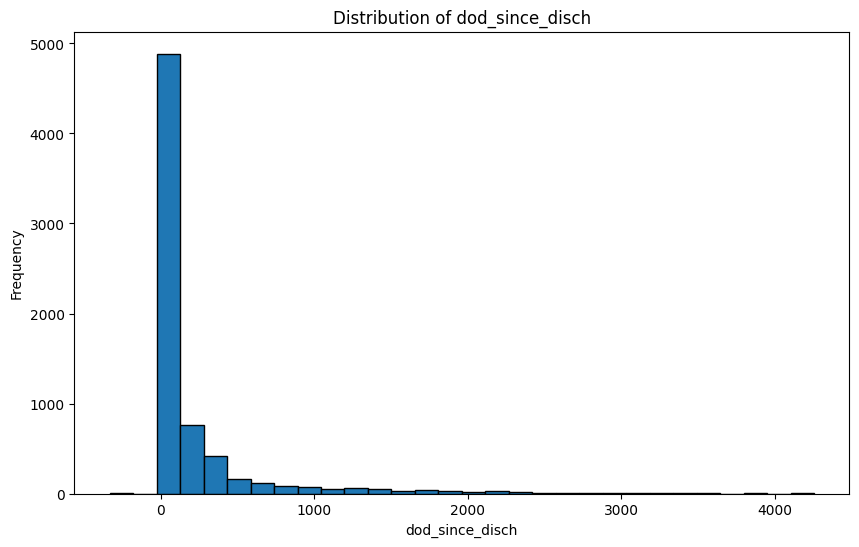

In [88]:
import matplotlib.pyplot as plt

# Assuming final_df_with_dod is your DataFrame and dod_since_disch is a column in that DataFrame
plt.figure(figsize=(10,6))
plt.hist(final_df_with_dod['dod_since_disch'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of dod_since_disch')
plt.xlabel('dod_since_disch')
plt.ylabel('Frequency')
plt.show()